In [83]:
import sys 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
from pandas import read_excel, DataFrame, pivot_table

In [84]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

# 연구과제

## 문제1

다음 데이터는 2020년 2월 5일부터 2023년 5월 31일까지 서울과 전국의 Covid19 일일 확진자 수를 기록한 데이터이다. 조사 기간동안 서울과 전국의 확진자 수가 어떻게 변화하고 있는지에 대한 추이를 시각화 하라.

| 기준일        | 서울시 일일 확진 | 전국 일일 확진 |
|------------|-----------|----------|
| 2023-05-31 | 5987      | 24411    |
| 2023-05-30 | 3326      | 13529    |
| 2023-05-29 | 1393      | 6868     |
| 2023-05-28 | 1393      | 6868     |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/covid19_active.xlsx

> 출처: 서울시청 홈페이지


In [85]:
origin = read_excel('https://data.hossam.kr/pydata/covid19_active.xlsx')
origin

,기준일,서울시 일일 확진,전국 일일 확진
0,2023-05-31,5987.0,24411.0
1,2023-05-30,3326.0,13529.0
2,2023-05-29,1393.0,6868.0
3,2023-05-28,1393.0,6868.0
4,2023-05-27,4078.0,17796.0
...,...,...,...
391,2022-05-05,6645.0,42296.0
392,2022-05-04,7436.0,49064.0
393,2022-05-03,8709.0,51131.0
394,2022-05-02,2653.0,20084.0


In [86]:
y1 = list(origin['서울시 일일 확진'])[::-1]
y2 = list(origin['전국 일일 확진'])[::-1]
x = np.arange(0, len(y1))
xticks = list(origin['기준일'])[::-1]
xticks_new = [str(x)[:10] for x in xticks]
x, y1, y2, xticks_new

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

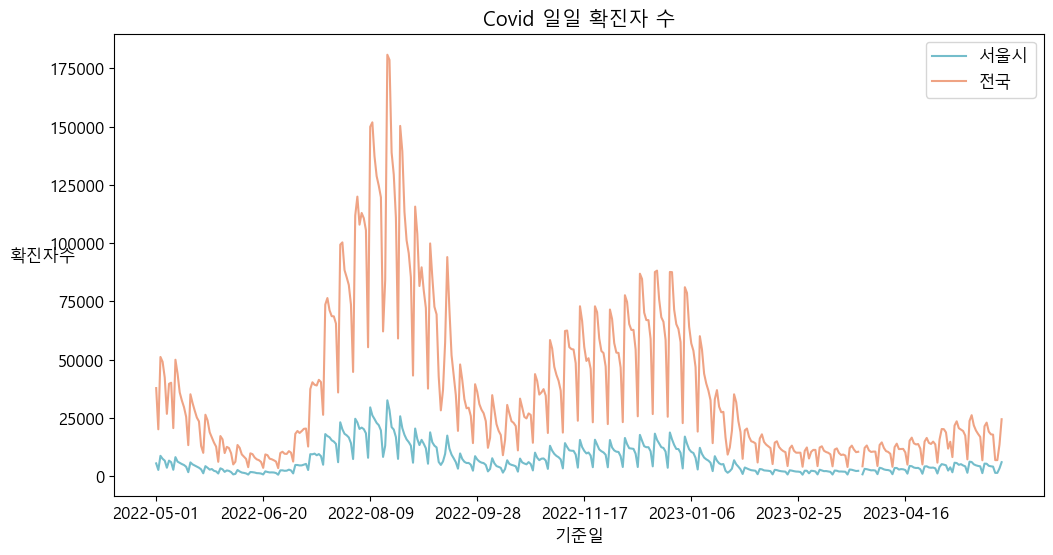

In [87]:
plt.figure()
plt.title('Covid 일일 확진자 수')
plt.plot(y1, color = '#74BDCB', label = '서울시')
plt.plot(y2, color = '#EFA384', label = '전국')
plt.legend()
plt.xlabel('기준일')
plt.xticks(x[::50], xticks_new[::50])
plt.ylabel('확진자수', rotation=0)
plt.savefig('문제1.png',dpi = 300)
plt.show()
plt.close()

## 문제2

다음 데이터는 `2021년 06월 01일`부터 `2023년 06월 30일`까지의 비트코인 시세 데이터의 일부이다.

| 날짜         | 종가      | 시가      | 고가      | 저가      | 거래량     | 변동 %   |
|------------|---------|---------|---------|---------|---------|--------|
| 2021-06-01 | 36,688  | 37,294  | 37,850  | 35,743  | 113.48K | -1.64% |
| 2021-06-02 | 37,556  | 36,688  | 38,200  | 35,981  | 96.89K  | 2.37%  |
| 2021-06-03 | 39,187  | 37,556  | 39,462  | 37,194  | 106.44K | 4.34%  |
| 2021-06-04 | 36,851  | 39,191  | 39,255  | 35,660  | 127.71K | -5.96% |
| 2021-06-05 | 35,520  | 36,841  | 37,888  | 34,832  | 101.48K | -3.61% |
| 2021-06-06 | 35,815  | 35,519  | 36,434  | 35,265  | 62.20K  | 0.83%  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/bitcoin.xlsx

이 데이터를 활용하여 날짜별 종가와 시가가 어떻게 변화하고 있는지 보여주고자 한다. 단, x축의 간격을 10일 간격으로 설정하여 구현하시오.

In [88]:
origin = read_excel('https://data.hossam.kr/pydata/bitcoin.xlsx')
origin

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2021-06-01,36687.6,37294.3,37850.3,35742.7,113.48K,-0.0164
1,2021-06-02,37555.8,36687.7,38199.9,35981.1,96.89K,0.0237
2,2021-06-03,39187.3,37555.7,39462.3,37193.6,106.44K,0.0434
3,2021-06-04,36851.3,39191.4,39255.4,35659.9,127.71K,-0.0596
4,2021-06-05,35520.0,36841.2,37887.6,34832.0,101.48K,-0.0361
...,...,...,...,...,...,...,...
755,2023-06-26,30267.0,30466.3,30645.9,29986.3,58.71K,-0.0065
756,2023-06-27,30689.1,30267.0,30993.7,30231.3,55.82K,0.0139
757,2023-06-28,30078.6,30691.9,30703.4,29919.5,51.06K,-0.0199
758,2023-06-29,30445.7,30077.3,30823.1,30051.3,49.57K,0.0122


In [89]:
y1 = list(origin['종가'])
y2 = list(origin['시가'])
x = np.arange(0, len(y1))
xticks = list(origin['날짜'])
xticks_new = [str(x)[:10] for x in xticks] 
x, xticks_new

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

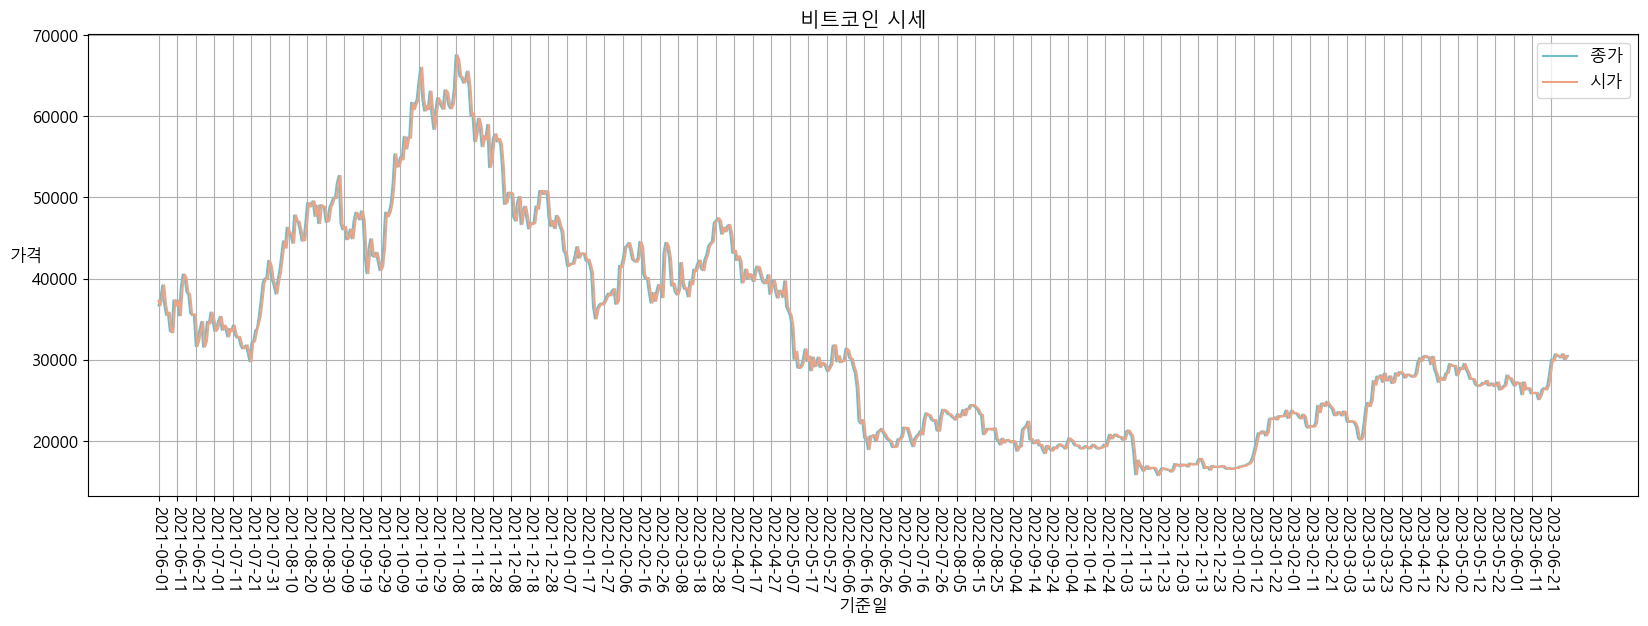

In [91]:
plt.figure(figsize=(20,6))
plt.title('비트코인 시세')
plt.plot(y1, color = '#74BDCB', label = '종가')
plt.plot(y2, color = '#EFA384', label = '시가')
plt.legend()
plt.grid()
plt.xlabel('기준일')
plt.xticks(x[::10], xticks_new[::10],rotation=270)
plt.ylabel('가격',rotation = 0)
plt.savefig('문제2.png',dpi = 300)
plt.show()
plt.close()

## 문제3

다음 데이터는 서울시의 행정구역별 노인복지시설의 수를 조사한 가상의 데이터 일부이다. 복지시설이 많은 상위 10개 지역에 대한 지역별 복지 시설 수를 시각화 하시오.

| 지역명          | 복지시설 |
|--------------|------|
| Jongno-gu    | 61   |
| Jung-gu      | 53   |
| Yongsan-gu   | 110  |
| Seongdong-gu | 155  |
| Gwangjin-gu  | 103  |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/senior_lsf.xlsx

In [92]:
origin = read_excel('https://data.hossam.kr/pydata/senior_lsf.xlsx')
origin

,지역명,복지시설
0,Jongno-gu,61
1,Jung-gu,53
2,Yongsan-gu,110
3,Seongdong-gu,155
4,Gwangjin-gu,103
5,Dongdaemun-gu,146
6,Jungnang-gu,128
7,Seongbuk-gu,158
8,Gangbuk-gu,111
9,Dobong-gu,139


In [93]:
y = list(origin['복지시설'])
y_sort = sorted(y,reverse=True)[:10]

xticks = list(origin['지역명'])
xticks_sort=[]
for i in y_sort:
    xticks_sort.append(xticks[y.index(i)])

x_sort = np.arange(0, len(y_sort))
x_sort, y_sort, xticks_sort

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [252, 215, 208, 192, 192, 184, 173, 160, 158, 155],
 ['Nowon-gu',
  'Gangseo-gu',
  'Yeongdeungpo-gu',
  'Yangcheon-gu',
  'Yangcheon-gu',
  'Gangnam-gu',
  'Songpa-gu',
  'Mapo-gu',
  'Seongbuk-gu',
  'Seongdong-gu'])

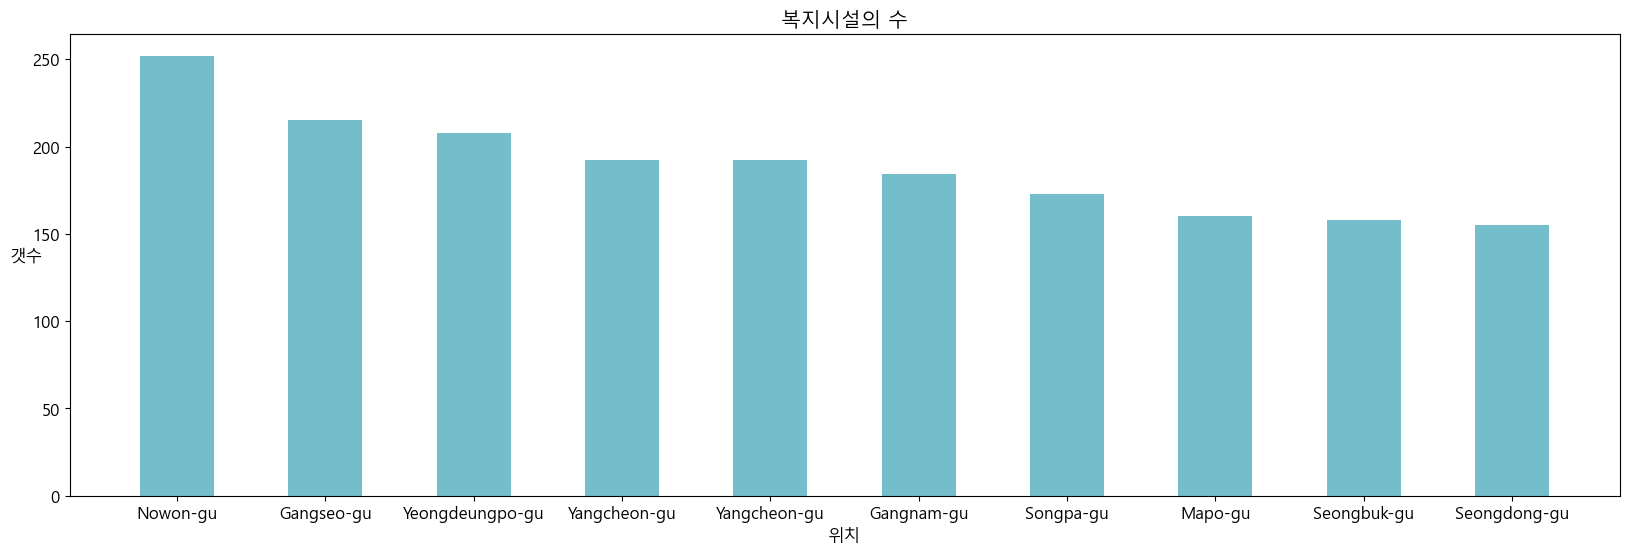

In [94]:
plt.figure(figsize=(20,6))
plt.title('복지시설의 수')
plt.bar(x_sort,y_sort, color = '#74BDCB',width=0.5)
plt.xlabel('위치')
plt.xticks(x_sort, xticks_sort)
plt.ylabel('갯수',rotation=0)
plt.savefig('문제3.png',dpi = 300)
plt.show()
plt.close()

## 문제4

다음 데이터는 도시별 인수수를 5개년도 단위로 조사한 가상의 자료이다.

각 도시별로 2015년도의 2010년도의 인구수를 비교하는 자료를 시각화 하시오.

단, 인구수의 표현 범위는 200만~1000만으로 한다.

| 도시 | 연도   | 인구      | 지역  |
|----|------|---------|-----|
| 서울 | 2015 | 9904312 | 수도권 |
| 서울 | 2010 | 9631482 | 수도권 |
| 서울 | 2005 | 9762546 | 수도권 |
| 부산 | 2015 | 3448737 | 경상권 |
| 부산 | 2010 | 3393191 | 경상권 |
| 부산 | 2005 | 3512547 | 경상권 |
| 인천 | 2015 | 2890451 | 수도권 |
| 인천 | 2010 | 2632035 | 수도권 |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/city_people.xlsx

In [116]:
origin = read_excel('https://data.hossam.kr/pydata/city_people.xlsx')
origin


,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,2632035,수도권


In [119]:
y1_set = list(set(origin['도시']))
y1 = list(origin['도시'])
y2 = list(origin['인구'])
xticks = list(origin['연도'])
x = np.arange(0, len(y1_set))

xticks_set = list(set(origin['연도']))
x, y1, y2, xticks
A=[]
B=[]
C=[]
for i in y1_set:
    for j,v in enumerate(y1):
        if i ==v== '서울': A.append(y2[j])
        if i ==v== '부산': B.append(y2[j])
        if i ==v== '인천': C.append(y2[j])
x

array([0, 1, 2])

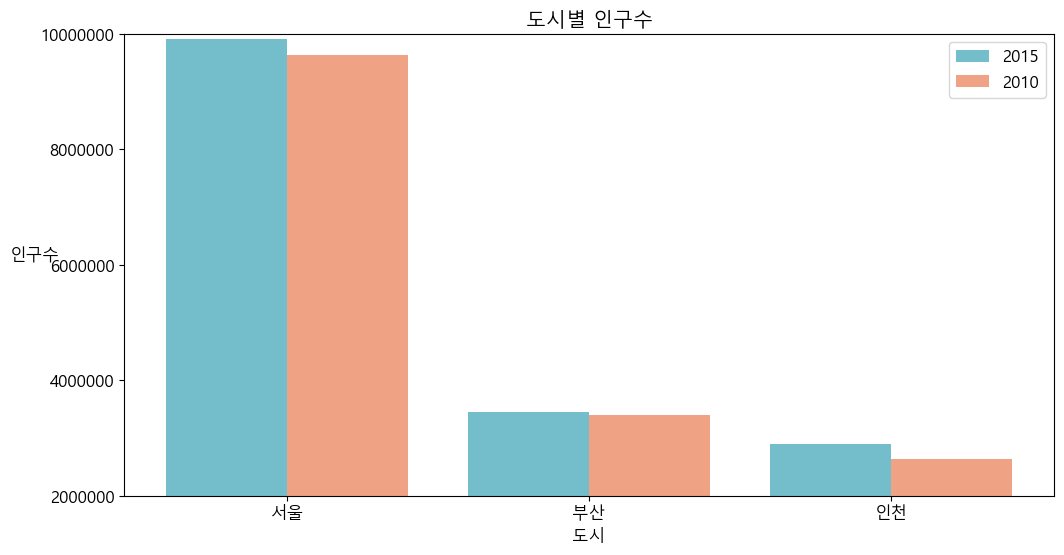

In [129]:
plt.figure()
plt.title('도시별 인구수')
plt.bar(x[:3]-0.2,[A[0],B[0],C[0]], color = '#74BDCB',width=0.4, label = '2015')
plt.bar(x[:3]+0.2,[A[1],B[1],C[1]], color = '#EFA384',width=0.4, label = '2010')
plt.legend()
plt.xlabel('도시')
plt.yticks([2000000,4000000,6000000,8000000,10000000],[2000000,4000000,6000000,8000000,10000000])
plt.ylim(2000000, 10000000)   
plt.xticks(x[:3],['서울','부산','인천'])
plt.ylabel('인구수',rotation=0)
plt.savefig('문제4.png',dpi = 300)
plt.show()
plt.close()

## 문제5

다음 데이터는 종사자 규모별 업체수를 2015년과 2016년도에 걸쳐 조사한 데이터이다.

종사자 규모에 따른 업체 수를 확인할 수 있는 세로 막대 그래프를 구현하시오. 이 때 각 데이터의 범주는 년도로 설정하시오.

| 종사자규모별   | 2015  | 2016  |
|----------|-------|-------|
| 1~4명     | 553.5 | 576.7 |
| 5~9명     | 211.6 | 216.8 |
| 10~29명   | 194.7 | 195.5 |
| 30~49명   | 227.4 | 227.4 |
| 50~99명   | 152.8 | 155.7 |
| 100~199명 | 221.9 | 220.6 |
| 200~299명 | 80.9  | 81    |
| 300~999명 | 100.5 | 99.3  |
| 1000명 이상 | 557.6 | 549.7 |

전체 데이터는 아래의 URL에서 얻을 수 있다.

> https://data.hossam.kr/pydata/jobs_by_scale.xlsx

> 출처: 국가통계포털

In [98]:
origin = read_excel('https://data.hossam.kr/pydata/jobs_by_scale.xlsx')
origin

,종사자규모별,2015,2016
0,1~4명,553.5,576.7
1,5~9명,211.6,216.8
2,10~29명,194.7,195.5
3,30~49명,227.4,227.4
4,50~99명,152.8,155.7
5,100~199명,221.9,220.6
6,200~299명,80.9,81.0
7,300~999명,100.5,99.3
8,1000명 이상,557.6,549.7


In [99]:
y1 = list(origin[2015])
y2 = list(origin[2016])
x = np.arange(0, len(y1))
xticks = list(origin['종사자규모별'])
x, y1, y2, xticks

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [553.5, 211.6, 194.7, 227.4, 152.8, 221.9, 80.9, 100.5, 557.6],
 [576.7, 216.8, 195.5, 227.4, 155.7, 220.6, 81.0, 99.3, 549.7],
 ['1~4명',
  '5~9명',
  '10~29명',
  '30~49명',
  '50~99명',
  '100~199명',
  '200~299명',
  '300~999명',
  '1000명 이상'])

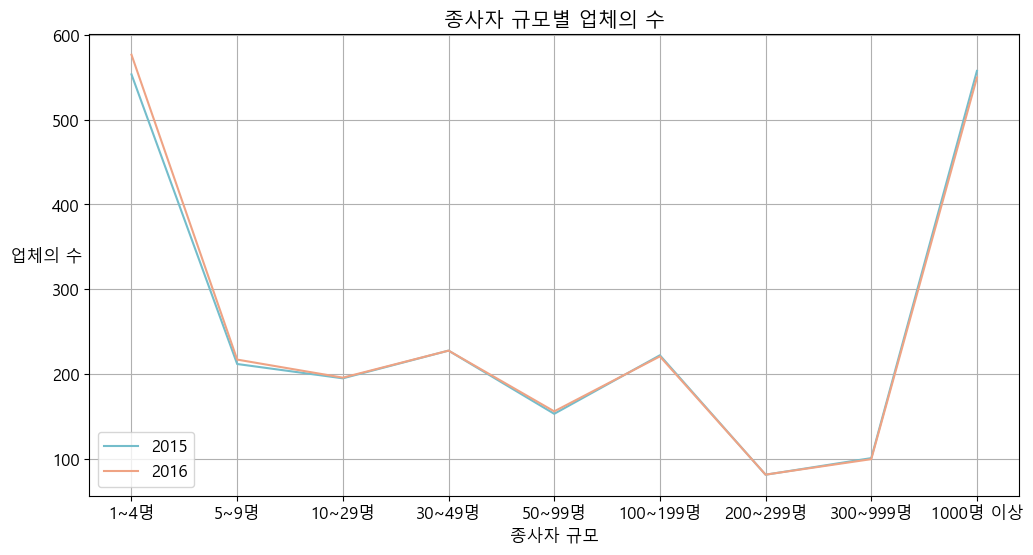

In [100]:
plt.figure()
plt.title('종사자 규모별 업체의 수')
plt.plot(y1, color = '#74BDCB', label = '2015')
plt.plot(y2, color = '#EFA384', label = '2016')
plt.legend()
plt.xlabel('종사자 규모')
plt.xticks(x,xticks)
plt.ylabel('업체의 수',rotation = 0)
plt.savefig('문제5.png',dpi = 300)
plt.grid()
plt.show()
plt.close()